# Decision Trees

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

## Step-1: Importing the packages
Our primary packages involved in building our model are pandas, scikit-learn, and NumPy. Follow the code to import the required packages in python.

In [34]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

## Step-2: Importing data and EDA
In this step, we will be utilizing the ‘Pandas’ package available in python to import and do some EDA on it. The dataset we will be using to build our decision tree model is a drug dataset that is prescribed to patients based on certain criteria. 

In [49]:
df = pd.read_csv('drug200.csv')

In [50]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Step-3: Data Processing
We can see that attributes like Sex, BP, and Cholesterol are categorical and object type in nature. The problem is, the decision tree algorithm in scikit-learn does not support X variables to be ‘object’ type in nature. So, it is necessary to convert these ‘object’ values into ‘binary’ values.

In [41]:
for i in df.Sex.values:
    if i  == 'M':
        df.Sex.replace(i, 0, inplace = True)
    else:
        df.Sex.replace(i, 1, inplace = True)

for i in df.BP.values:
    if i == 'LOW':
        df.BP.replace(i, 0, inplace = True)
    elif i == 'NORMAL':
        df.BP.replace(i, 1, inplace = True)
    elif i == 'HIGH':
        df.BP.replace(i, 2, inplace = True)

for i in df.Cholesterol.values:
    if i == 'LOW':
        df.Cholesterol.replace(i, 0, inplace = True)
    else:
        df.Cholesterol.replace(i, 1, inplace = True)

print(df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  drugY
1     47    1   0            1   13.093  drugC
2     47    1   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    1   0            1   12.006  drugC
197   52    1   1            1    9.894  drugX
198   23    1   1            1   14.020  drugX
199   40    1   0            1   11.349  drugX

[200 rows x 6 columns]


### You can also use the preprocessing package
____________________________________________

from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

## Step-4: Splitting the data
After processing our data to be of the right structure, we are now set to define the ‘X’ variable or the independent variable and the ‘Y’ variable or the dependent variable.

In [42]:
X_var = df[['Sex', 'BP', 'Age', 'Cholesterol', 'Na_to_K']].values # independent variable
y_var = df['Drug'].values # dependent variable

In [44]:
print('X variable samples : {}'.format(X_var[:5]))
print('Y variable samples : {}'.format(y_var[:5]))

X variable samples : [[ 1.     2.    23.     1.    25.355]
 [ 1.     0.    47.     1.    13.093]
 [ 1.     0.    47.     1.    10.114]
 [ 1.     1.    28.     1.     7.798]
 [ 1.     0.    61.     1.    18.043]]
Y variable samples : ['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))

X_train shape : (160, 5)
X_test shape : (40, 5)
y_train shape : (160,)
y_test shape : (40,)


## Step-5: Building the model & Predictions
Building a decision tree can be feasibly done with the help of the ‘DecisionTreeClassifier’ algorithm provided by the scikit-learn package. After that, we can make predictions of our data using our trained model. Finally, the precision of our predicted results can be calculated using the ‘accuracy_score’ evaluation metric.

In [47]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

Accuracy of the model is 88%


## Step-6: Visualizing the model
Now that we have our decision tree model and let’s visualize it by utilizing the ‘plot_tree’ function provided by the scikit-learn package in python. Follow the code to produce a beautiful tree diagram out of your decision tree model in python.

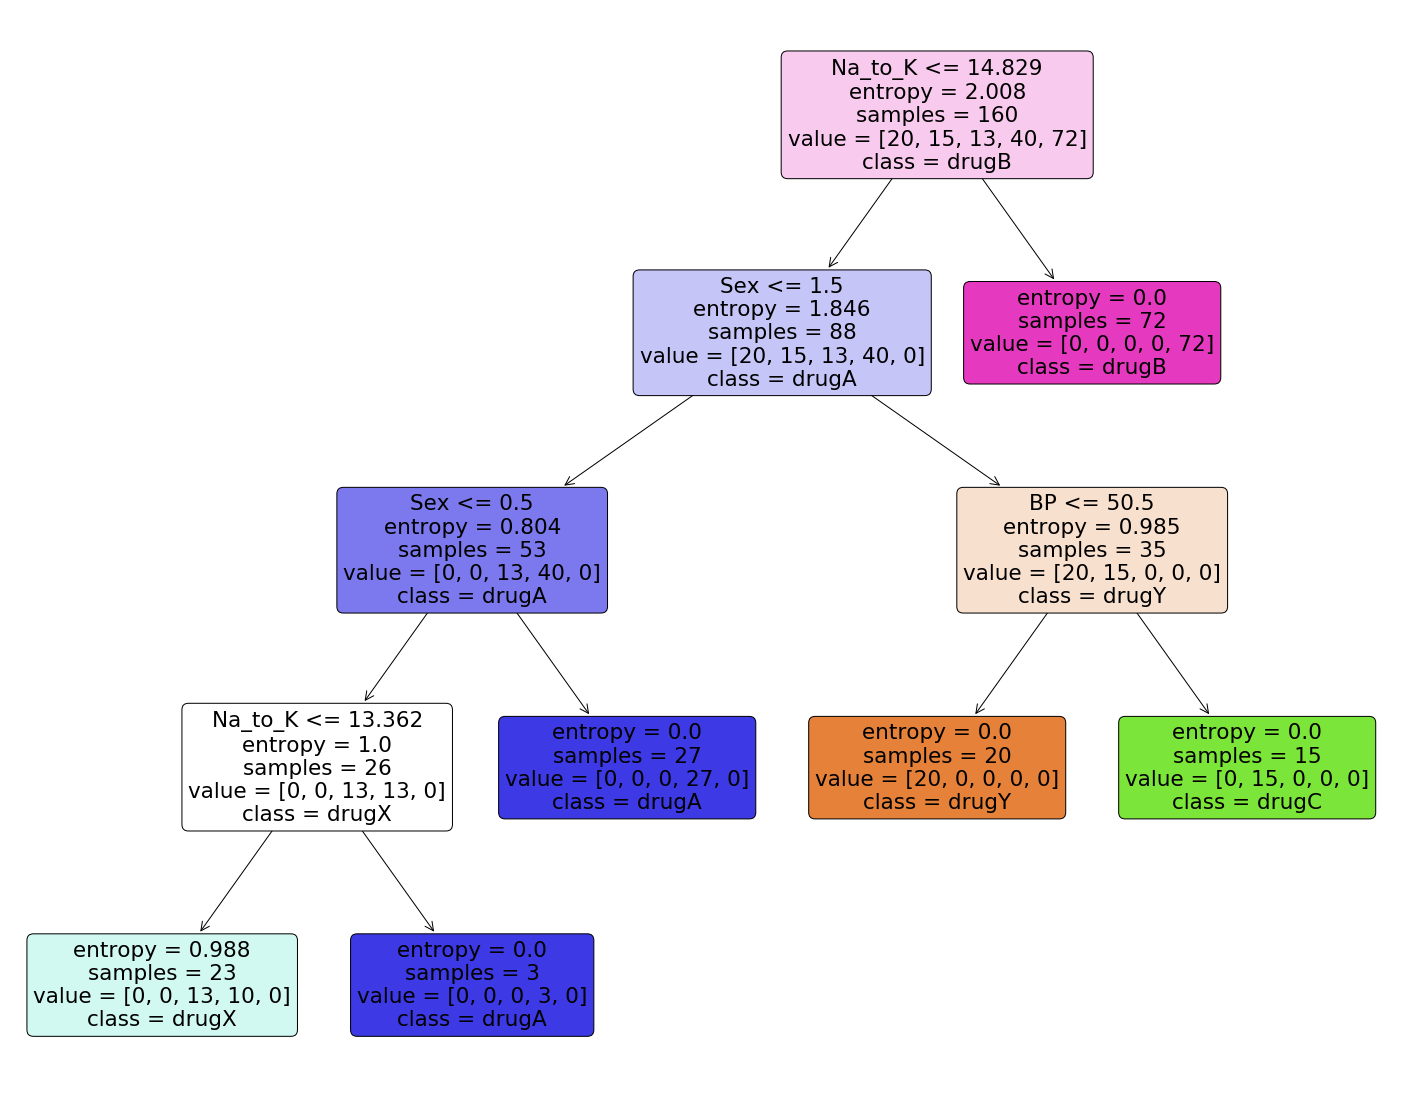

In [48]:
feature_names = df.columns[:5]
target_names = df['Drug'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
